In [5]:
import csv
import numpy as np
# with open('data.csv') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         print(row)



def read_data_from_csv(name, timestamps):
    final_data = dict()
    with open('data.csv') as f:
        data = [[], [], [], [], [], [], [], [], [], [], [], [], []] # ???
        reader = csv.reader(f)
        for row in reader:
            if (row[3] >= '2024-08-21 12:26:38') and (row[3] <= '2024-08-21 12:27:48'):
                data[0].append(row) # проезд на нормально откалиброванной машине 
            if (row[3] >= '2024-08-21 12:41:00') and (row[3] <= '2024-08-21 12:42:10'):
                data[1].append(row) # виляния с низкой частотой и средней амплитудой на прямой
            if (row[3] >= '2024-08-21 12:55:25') and (row[3] <= '2024-08-21 12:56:55'):
                data[2].append(row) # яркий частый тремор на прямой - выская частота виляний, малая амплитуда, активно крутит колесами на месте
            if (row[3] >= '2024-08-21 13:06:17') and (row[3] <= '2024-08-21 13:07:47'):
                data[3].append(row) # виляния с самой низкой частотой и средней амплитудой на прямой
            if (row[3] >= '2024-08-21 13:25:00') and (row[3] <= '2024-08-21 13:26:20'):
                data[4].append(row) # менее яркий тремор на прямой в сравнении с высоким Р - выская частота виляний, малая амплитуда, активно крутит колесами на месте
            if (row[3] >= '2024-08-21 13:35:25') and (row[3] <= '2024-08-21 13:36:45'):
                data[5].append(row) # виляние с довольно высокой частотой и средней амплитудой, весьма некомфортно
            if (row[3] >= '2024-08-21 13:40:13') and (row[3] <= '2024-08-21 13:41:33'):
                data[6].append(row) # неяркие виляния с малой частотой и амплитудой
            if (row[3] >= '2024-08-21 13:45:52') and (row[3] <= '2024-08-21 13:47:22'):
                data[7].append(row) # неуверенный выход на траекторию с виляниями, по прямой виляния с малой частотой и амплитудой
            if (row[3] >= '2024-08-21 13:49:37') and (row[3] <= '2024-08-21 13:51:07'):
                data[8].append(row) # радикальный выход на тракторию с поворотами колёс едва ли не в упор. по прямой виляния со средной частотой и средней амплитудой
            if (row[3] >= '2024-08-21 15:17:03') and (row[3] <= '2024-08-21 15:27:53'):
                data[9].append(row) # проезды по техколее в разные стороны по разным камерам с хорошей точностью с нормальными калибами
            if (row[3] >= '2024-08-21 15:44:41') and (row[3] <= '2024-08-21 15:49:51'):
                data[10].append(row) # ехал в целом терпимо, константное смещение
            if (row[3] >= '2024-08-21 15:56:45') and (row[3] <= '2024-08-21 16:04:15'):
                data[11].append(row) # по левой константное смещение с виляниями, по правой совершенно неадекватная езда                
    return data
#read_data_from_csv(1, 1)

In [42]:
import pandas as pd

data = pd.read_csv("data.csv")
data["time"] = pd.to_datetime(data["ts"], format='mixed').dt.time

In [58]:
timestamps = pd.Series(["2024-08-21 12:26:38", "2024-08-21 12:27:48", "2024-08-21 12:41:00", '2024-08-21 12:42:10', '2024-08-21 12:55:25', \
                '2024-08-21 12:56:55', '2024-08-21 13:06:17', '2024-08-21 13:07:47', '2024-08-21 13:25:00','2024-08-21 13:26:20',\
                '2024-08-21 13:35:25', '2024-08-21 13:36:45', '2024-08-21 13:40:13', '2024-08-21 13:41:33', '2024-08-21 13:45:52',\
                '2024-08-21 13:47:22', '2024-08-21 13:49:37', '2024-08-21 13:51:07', '2024-08-21 15:17:03','2024-08-21 15:27:53',\
                '2024-08-21 15:44:41', '2024-08-21 15:49:51', '2024-08-21 15:56:45', '2024-08-21 16:04:15'])

timestamps = pd.DataFrame(timestamps, columns=["timestamps"])
timestamps['time'] = pd.to_datetime(timestamps["timestamps"], format='mixed').dt.time

In [59]:
import plotly.express as px

fig = data.plot(x="time", y="cte")

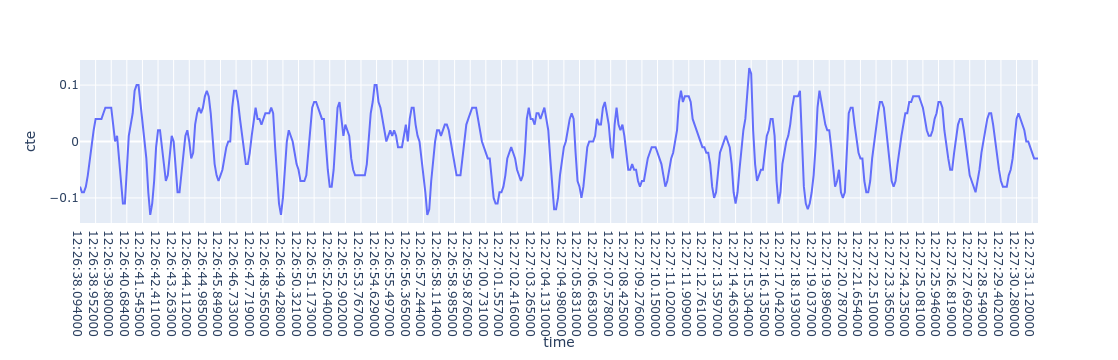

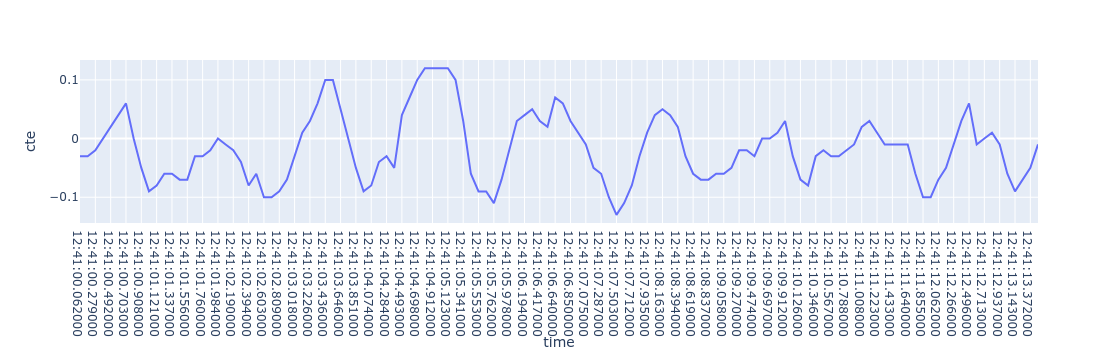

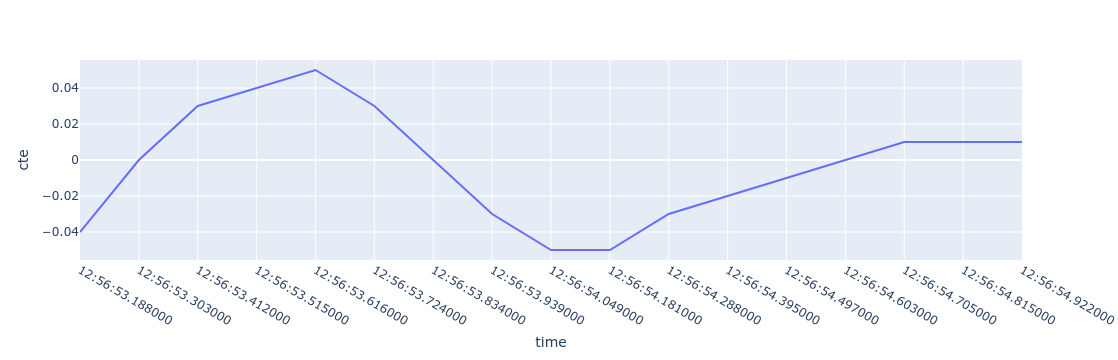

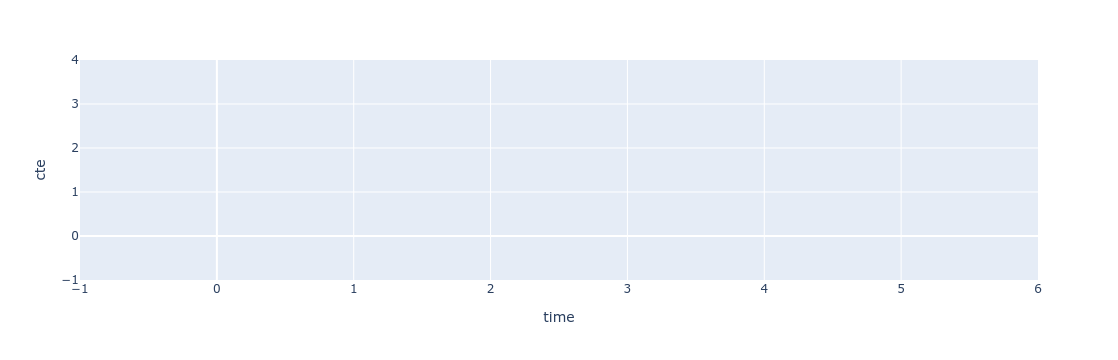

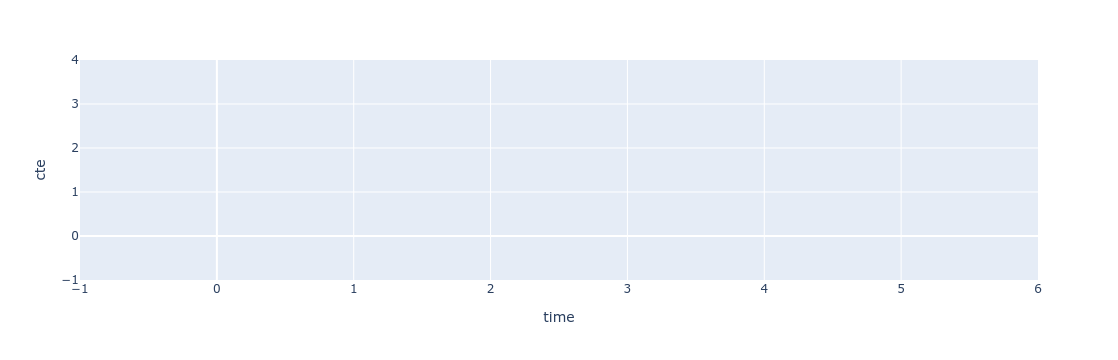

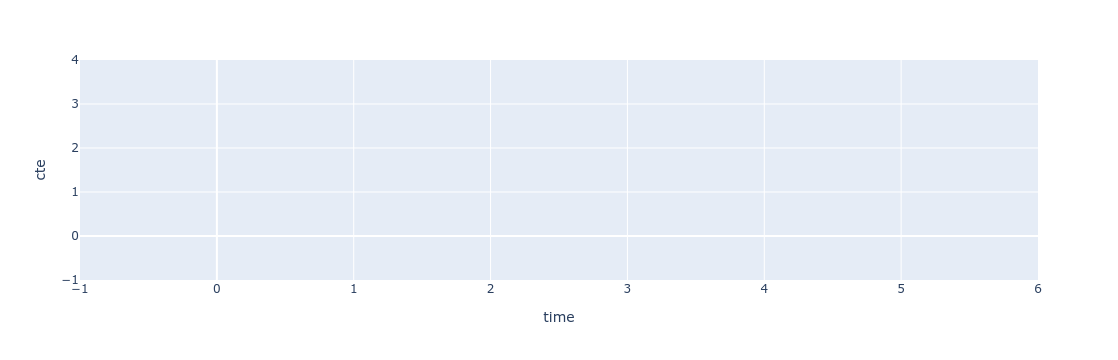

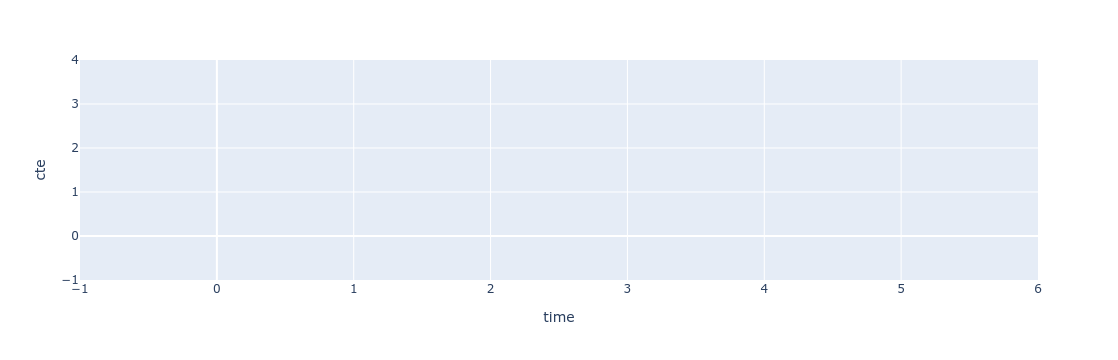

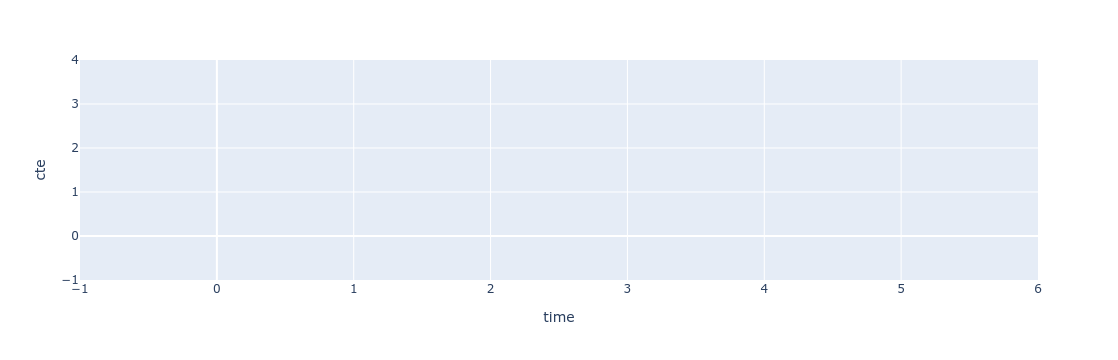

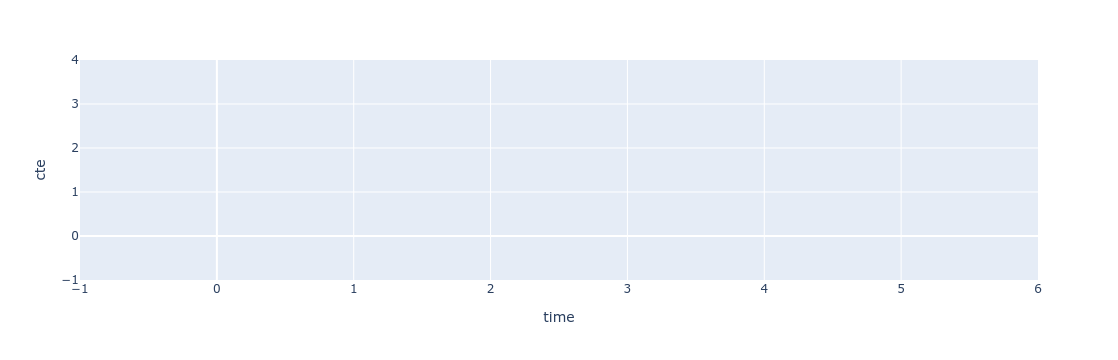

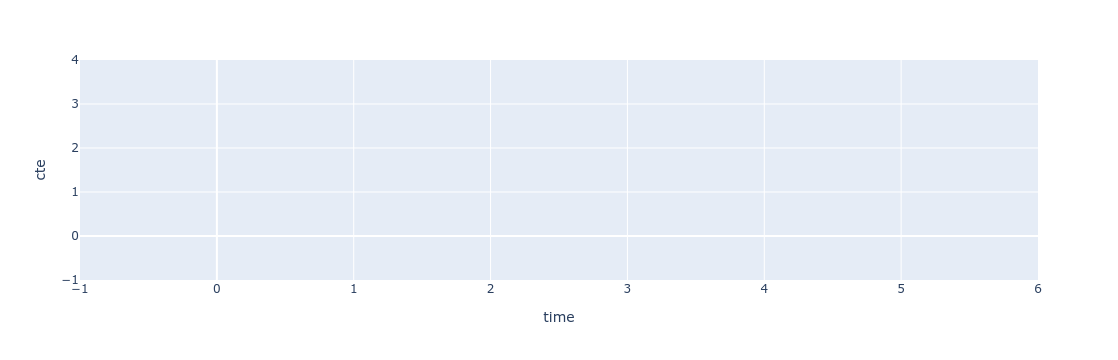

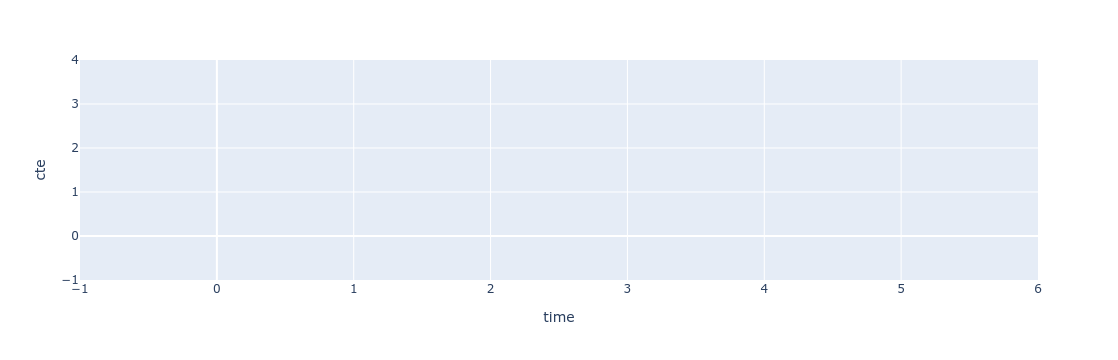

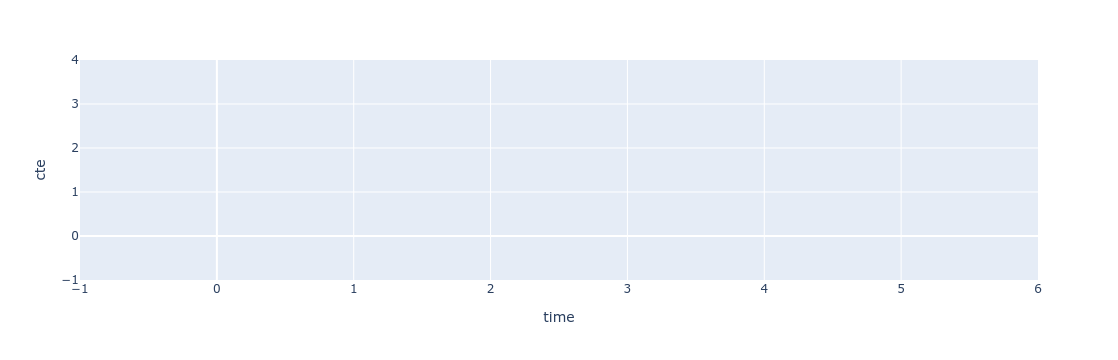

In [60]:
pd.options.plotting.backend = "plotly"

for i in range(0, timestamps.shape[0], 2):
    start = timestamps.at[i, "time"]
    end = timestamps.at[i + 1, "time"]
    piece_of_data = data[(end >= data["time"]) & (data['time'] >= start)]
    fig = piece_of_data.plot(x="time", y="cte")
    fig.show()